<h1>ENSO Diagnostics (Do Not Distribute)</h1>

In [1]:
import math
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import cartopy.feature as cf
from src.datareader import datareader as dr
from src.util import util, timeutil, stats

<h5>Get data readers</h5>

In [2]:
ufs_models = ['baseline', 'beta.0.1', 'c96_beta.0.1', 'cpc_ics']

In [3]:
era5_data_reader = dr.getDataReader(datasource='ERA5')

No filename provided; deferring to default
Reading data from gs://gcp-public-data-arco-era5/ar/1959-2022-6h-512x256_equiangular_conservative.zarr
Standardizing coordinate system
Dataset ready.


In [4]:
ufs_vars_list = ['tmpsfc', 'tsfc']
era5_var = 'sea_surface_temperature'

In [5]:
era5_data_reader.describe(era5_var)


Variable: sea_surface_temperature
Dimensions: ('time', 'lat', 'lon')
Shape: (92044, 256, 512)
Attributes:
  - long_name: Sea surface temperature
  - short_name: sst
  - units: K


<h5>Define time period</h5>

In [6]:
time_range = ("1994-02-01","2021-08-31T23")
initmonths = (11,)

<h5>Define nino 3.4 region</h5>

In [7]:
region = {
    'latmin': -5.0,
    'latmax': 5.0,
    'lonmin': 190.0,
    'lonmax':240.0
}

<h5>Get the monthly climatology for nino 3.4</h5>

In [8]:
%%capture captured_output
ufs_ds = util.combine_ufs_means(ufs_models, ufs_vars_list, time_range, region=region, initmonths=initmonths)

<h5>Get the corresponding ERA5 data</h5>

In [9]:
era5_ds = era5_data_reader.retrieve(var=era5_var,
                lat=(region['latmin'], region['latmax']),
                lon=(region['lonmin'], region['lonmax']),
                time=time_range)

Slicing by lat
Slicing by lon
Slicing by time


<h5>Calculate climatology (this may take a couple minutes)</h5>

In [10]:
ufs_stats = stats.calc_climatology(ufs_ds, area_mean=True)

/home/thamzey/miniforge2/envs/ufs_model_evaluation_py311/lib/python3.11/site-packages/dask/array/numpy_compat.py:57: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/home/thamzey/miniforge2/envs/ufs_model_evaluation_py311/lib/python3.11/site-packages/dask/array/numpy_compat.py:57: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


In [11]:
era5_stats = stats.calc_climatology(era5_ds, area_mean=True)

<h2>Plot SST Index and Anomaly</h2>

Generating 4 panel(s).
Processing years 1994 to 1999
Processing years 2000 to 2009
Processing years 2010 to 2019
Processing years 2020 to 2020


<module 'matplotlib.pyplot' from '/home/thamzey/miniforge2/envs/ufs_model_evaluation_py311/lib/python3.11/site-packages/matplotlib/pyplot.py'>

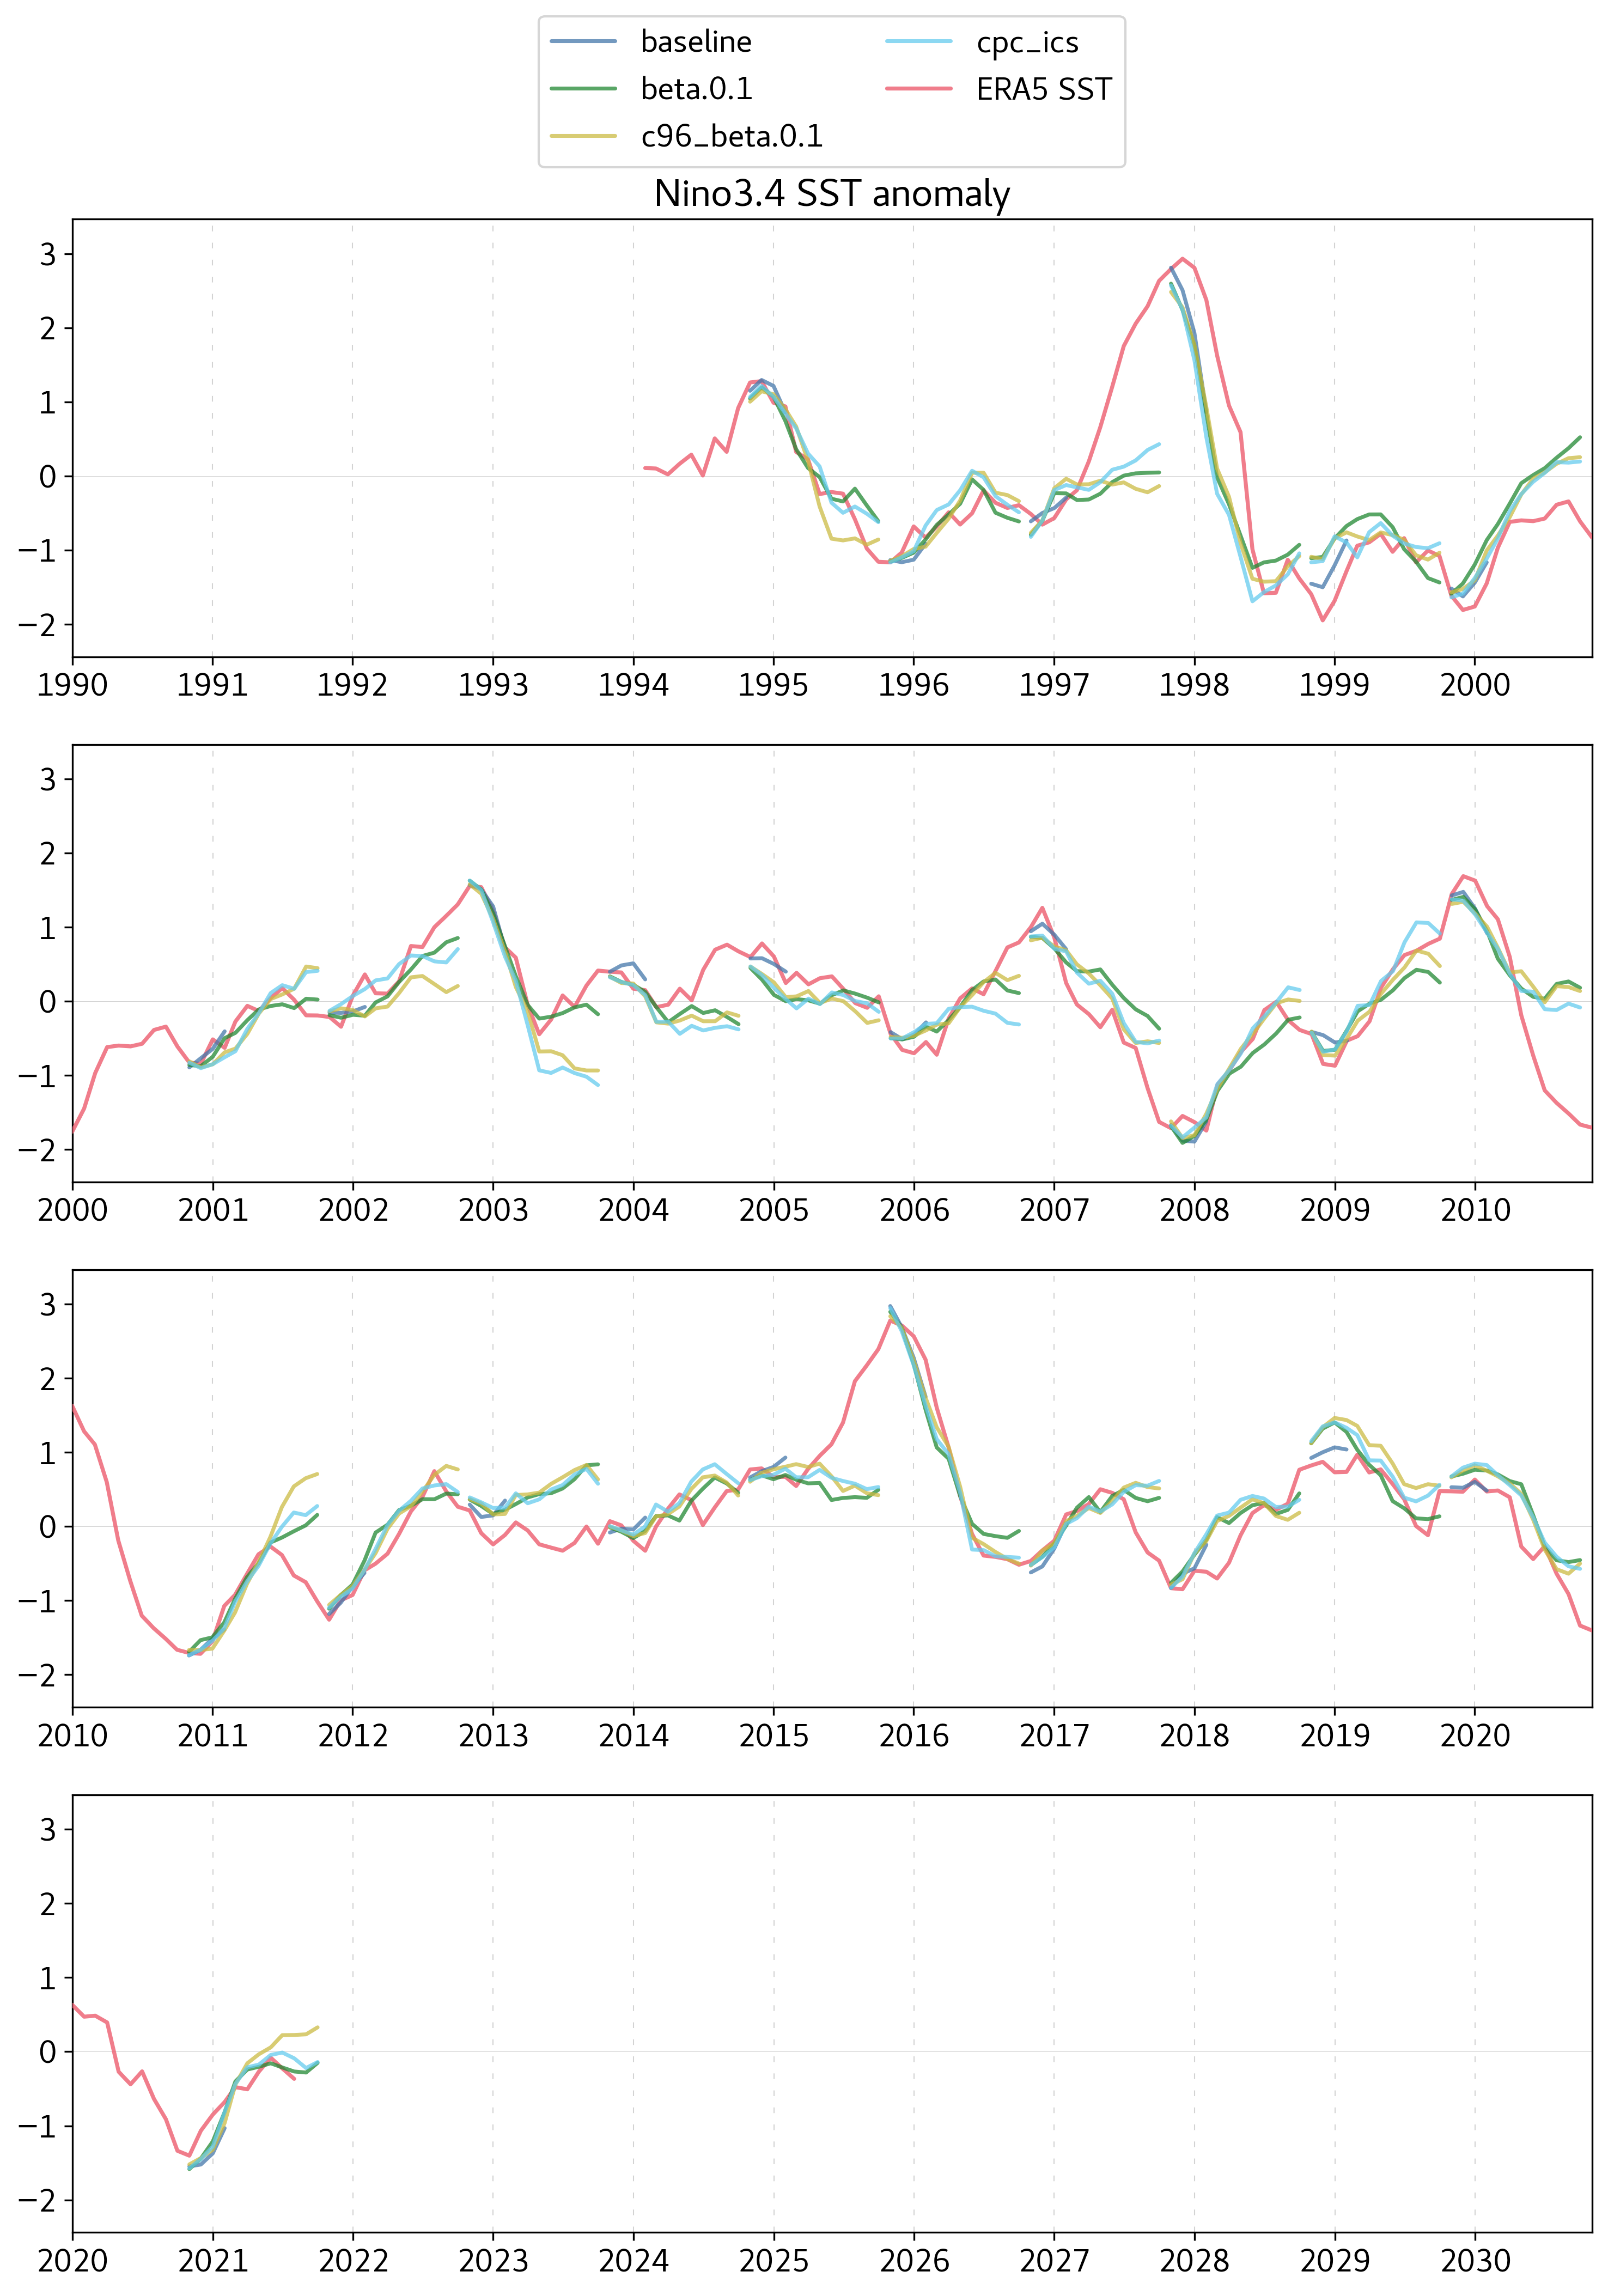

In [12]:
stats.plot_index_spaghetti(ufs_stats=ufs_stats,
                           verif_stats=era5_stats,
                           calc_anomaly=True,
                           use_member_climatology=True,
                           title=f'Nino3.4 SST',
                           verif_label='ERA5 SST')